<a href="https://colab.research.google.com/github/mohamed3418/data-analysis-profissional-track-projects/blob/main/investigate_a_dataset_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Project: Investigate a Dataset (noshow appointments!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.


In [69]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder


<a id='wrangling'></a>
  ## Data Wrangling

>  there i will load my data 

### General Properties

In [70]:

df = pd.read_csv('/content/drive/MyDrive/data sets/noshowappointments-kagglev2-may-2016.csv')
df.head()   

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
from google.colab import drive
drive.mount('/content/drive')   

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [74]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [75]:
df.duplicated().sum()

0

In [76]:
df.PatientId.duplicated().sum()

48228

In [77]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [78]:
df[['PatientId','No-show']].duplicated().sum()

38710

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

### fixing some typos in columns name

In [79]:
df.rename(columns={'Hipertension':"Hypertension"},inplace=True)
df.rename(columns={'No-show':"No_show"},inplace=True)

## removing duplicates values

In [80]:
df.drop_duplicates(['PatientId','No_show'],inplace=True)

In [81]:
df.shape

(71817, 14)

In [82]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## drop the age younger than 0 


In [83]:
df.drop(df[df.Age<0].index, inplace = True)   
    

In [84]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.181600e+04,7.181600e+04,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000
mean,1.466249e+14,5.666493e+06,36.527501,0.095536,0.195068,0.070959,0.025036,0.020135,0.335566
std,2.544917e+14,7.313083e+04,23.378262,0.293956,0.396256,0.256758,0.156236,0.155338,0.472191
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175956e+12,5.631622e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.189425e+13,5.672882e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.457487e+13,5.716567e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# encoding the no show column 

In [85]:
ord_enc = OrdinalEncoder()
df["No_show"] = ord_enc.fit_transform(df[["No_show"]]).astype(int)

In [86]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


# drop the unnecessary columns

In [87]:
df.drop(columns=['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71816 entries, 0 to 110524
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         71816 non-null  object
 1   Age            71816 non-null  int64 
 2   Neighbourhood  71816 non-null  object
 3   Scholarship    71816 non-null  int64 
 4   Hypertension   71816 non-null  int64 
 5   Diabetes       71816 non-null  int64 
 6   Alcoholism     71816 non-null  int64 
 7   Handcap        71816 non-null  int64 
 8   SMS_received   71816 non-null  int64 
 9   No_show        71816 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 6.0+ MB


### what i did in the data 
i loaded the data and understand it and corect some typos in data cleaning process and deleted the unnecessary columns and rows 

<a id='eda'></a>
## Exploratory Data Analysis

> i will try to display some visualization to under stand the data more 
it will help me to make a correct analysis 
### general look on all columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa49b8f7710>,
      dtype=object)

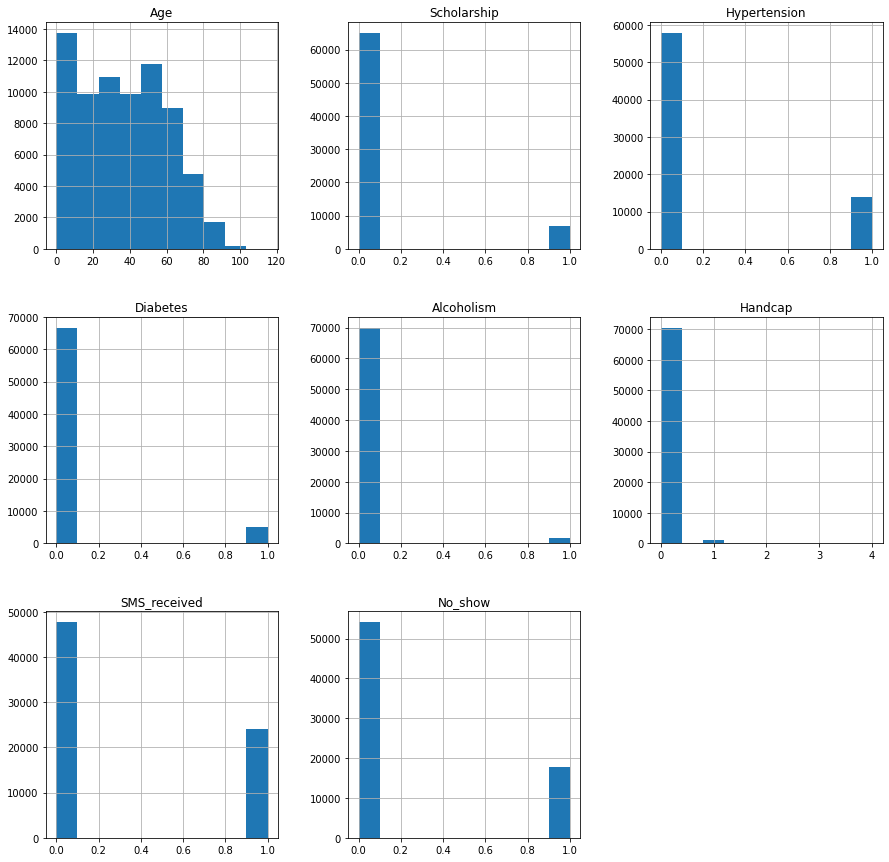

In [89]:
df.hist(figsize=(15,15))


### Research Question 2  (Replace this header name!)

## number of poeple who didnot attended 

In [132]:
show=df.No_show==0

show
df[show].count()

Gender           54153
Age              54153
Neighbourhood    54153
Scholarship      54153
Hypertension     54153
Diabetes         54153
Alcoholism       54153
Handcap          54153
SMS_received     54153
No_show          54153
dtype: int64

## number of poeple who  attend

In [133]:
noshow=df.No_show==1

noshow
df[noshow].count()

Gender           17663
Age              17663
Neighbourhood    17663
Scholarship      17663
Hypertension     17663
Diabetes         17663
Alcoholism       17663
Handcap          17663
SMS_received     17663
No_show          17663
dtype: int64

## the average for showed and no showed patients

In [134]:
df[df.No_show==0].mean(),df[df.No_show==1].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 No_show          0.000000
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 No_show          1.000000
 dtype: float64)


## Investigation for the influencing factors on the attendance rate

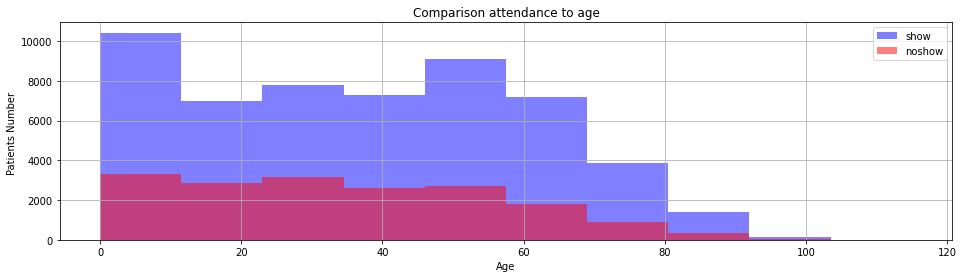

In [135]:
 # does age affect the attendence
def attendance(df,col_name, attended, absent):# setting
    plt.figure(figsize=[16,4])

    df[col_name][show].hist(alpha=.5, bins=10, color='blue', label='show')
    df[col_name][noshow].hist(alpha=.5,bins=10, color='red',label='noshow')

    plt.legend()
    plt.title('Comparison attendance to age')
    plt.xlabel("Age")
    plt.ylabel('Patients Number ')
attendance(df, 'Age', show, noshow)

from the vizualization i noticed that:

 the patients from 0 to 10 are the most showing then patients from 45 to 55 otherwise the least attendance patients grom 80 to 100 

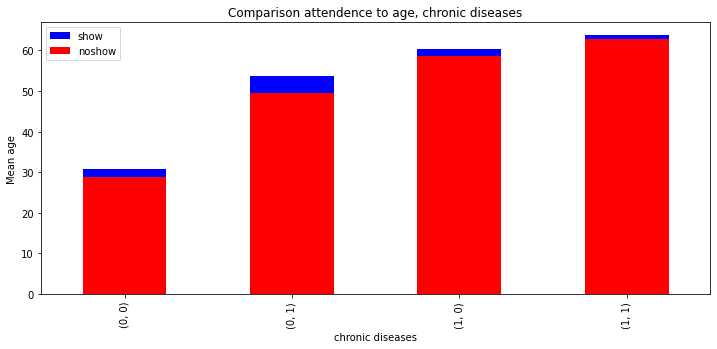

In [139]:
# does age and chronic atseases affect the attendence together
plt.figure(figsize=[12,5])# setting the figure size
df[show].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind='bar', color= 'blue',label='show')
df[noshow].groupby(['Hypertension',"Diabetes"]).mean()['Age'].plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('Comparison attendence to age, chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('Mean age');

In [137]:
df[show].groupby(['Hypertension', 'Diabetes']).mean()['Age'],df[noshow].groupby(['Hypertension',"Diabetes"]).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

1-the mean age tp people with no choronic  showing is 30 and noshowing is 28

2-the mean age of people with no hypertenion and have a disease  shoing is 53 and noshowing is 49.5 

3-the mean age of people with  hypertenion and dont have a disease  shoing is 60 and noshowing is 58

4-the mean age of people with  hypertenion and disease  shoing is 64 and noshowing is 63

5-there is no correlation between choronic disease and attending  

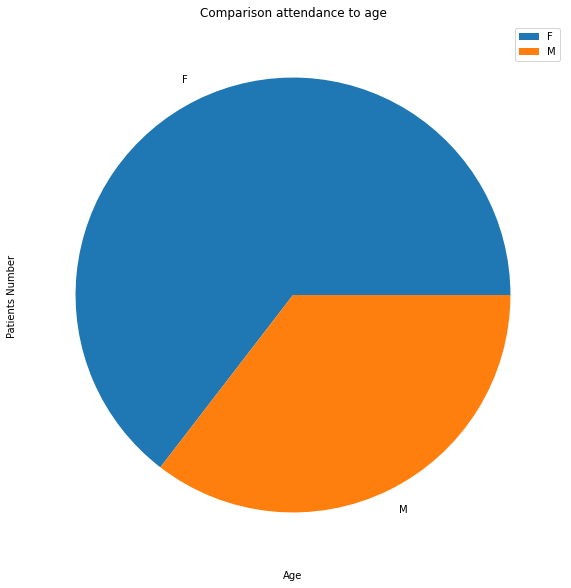

In [152]:
 # does gender affect the attendence
def attendance(df,col_name, attended):
    plt.figure(figsize=[20,10])

    df[col_name][show].value_counts().plot(kind='pie')
    plt.legend()
    plt.title('Comparison attendance to age')
    plt.xlabel("Age")
    plt.ylabel('Patients Number ')
attendance(df, 'Gender', show)

from the visualization i see that the female attendace more than  males

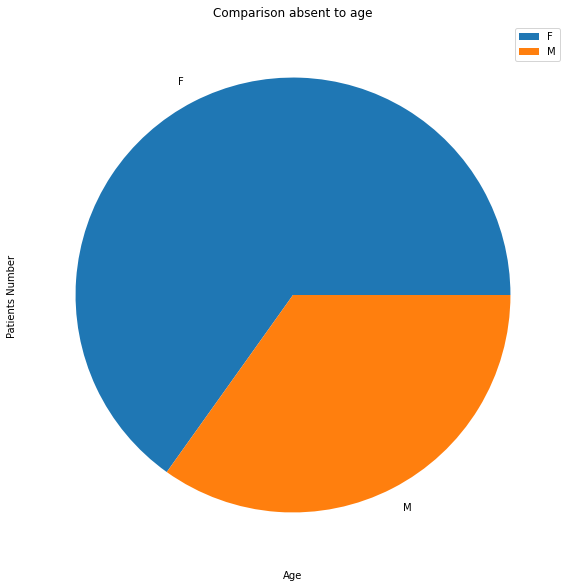

In [155]:
 # does gender affect the attendence
def attendance(df,col_name, absent):
    plt.figure(figsize=[20,10])

    df[col_name][noshow].value_counts().plot(kind='pie')
    plt.legend()
    plt.title('Comparison absent to age')
    plt.xlabel("Age")
    plt.ylabel('Patients Number ')
attendance(df, 'Gender', noshow)

from the visualization i see that the female attendace more than males

then 

the gender column is no affect on show or no show

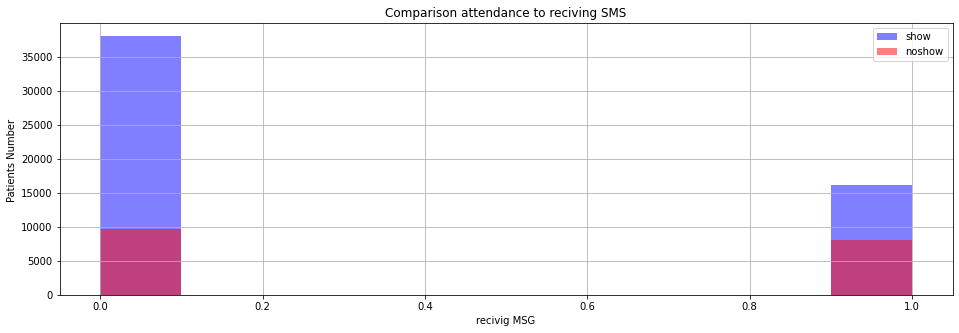

In [165]:
 # does recivig SMS affect the attendence
def attendance(df,col_name, attenr,absent):
    plt.figure(figsize=[16,5])

    df[col_name][show].hist( label='show',alpha=.5,bins=10,color='blue')
    df[col_name][noshow].hist( label='noshow',alpha=.5,bins=10,color='red')
    plt.legend()
    plt.title('Comparison attendance to reciving SMS')
    plt.xlabel("recivig MSG")
    plt.ylabel('Patients Number ')
attendance(df, 'SMS_received', show,noshow)

i see that the people not reciving MSG showing more than the people that recieved the MSG 

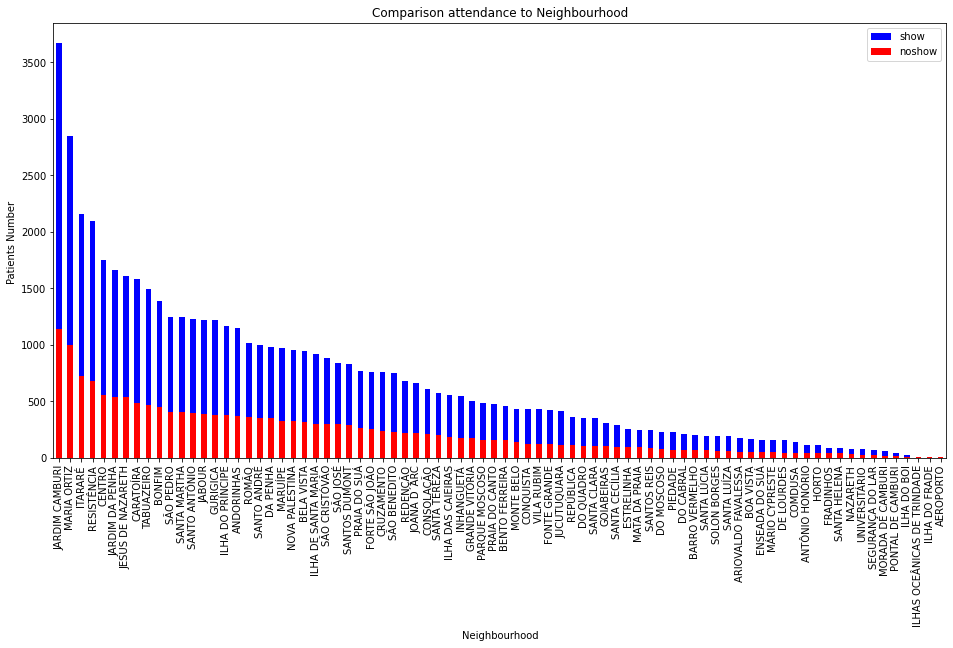

In [174]:
 # does nieberhood affect the attendence
def attendance(df,col_name, attenr,absent):
    plt.figure(figsize=[16,8])

    df[col_name][show].value_counts().plot(kind="bar", label='show',color='blue')
    df[col_name][noshow].value_counts().plot(kind="bar", label='noshow',color='red')
    plt.legend()
    plt.title('Comparison attendance to Neighbourhood')
    plt.xlabel("Neighbourhood")
    plt.ylabel('Patients Number ')
attendance(df, 'Neighbourhood', show,noshow)

'JARDIM CAMBURI ' has the largest number of patient and showing rate 
'ILHA DO FRADE'  has the smallest number of patient and showing rate

<a id='conclusions'></a>
## Conclusions

>age has a great correlation with showing rate and people in 0:8 years has the largest showing rate but peoplr from 80 to 100 has the smallest shoing rate 

>there is no correlation between gender and showing rate 
 
>people who didnot revived MSG are showing more than people recived the MSG 

>neibourhood afected on number of patient and shoeing rate 
>there is no correlation between (choronic & disease ) and showing rate
